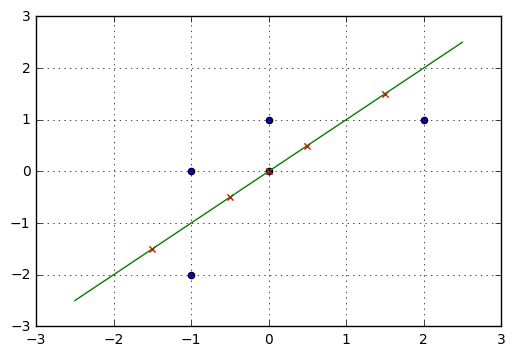

In [52]:
import numpy as np 
import matplotlib.pyplot as plt

def zeroMean(X):        
    means=np.mean(X,axis=1)
    X_mean=X
    for i in range(len(X_mean)):
        X_mean[i]=X_mean[i]-means[i]
    return X_mean,means

def percentage_n(lambdaVal,percentage):
    sortArray=np.sort(lambdaVal) 
    sortArray=sortArray[-1::-1] 
    arraySum=sum(sortArray)
    tmpSum=0
    num=0
    for i in sortArray:
        tmpSum+=i
        num+=1
        if tmpSum>=arraySum*percentage:
            return num

def pca(X_raw,percentage=0.99):  
    X,means=zeroMean(X_raw) 
    cov=np.dot(X,X.T)/len(X[0])
    lambdaVal,P=np.linalg.eig(np.mat(cov))
    k=percentage_n(lambdaVal,percentage)
    sortlambadaVal=np.argsort(lambdaVal)   
    k_lambadaIndex=sortlambadaVal[-1:-(k+1):-1]  
    k_P=P[:,k_lambadaIndex] 

    Y=k_P.T*X_raw  
#     print  Y
    # newX=k_P*k_P.T*X_raw 
    # for i in range(len(newX)):
    #     newX[i]+=means[i]
    # print newX
    # exit()
    return Y,X_raw 
data=np.array([[-1,-1,0,2,0],[-2,0,0,1,1]],dtype=np.float)
# print data
Y,newX=pca(data,0.8)
plt.scatter(data[0,:],data[1,:])
plt.scatter(Y/(2**0.5),Y/(2**0.5),c='r',marker='x')
plt.grid(True)
plt.plot([-2.5,0.5,1,2.5], [-2.5,0.5,1,2.5], 'g-')
plt.axis([-2.5,2.5,-2.5 ,2.5])
plt.yticks([i for i in range(-3,4,1)])
plt.xticks([i for i in range(-3,4,1)])
plt.show()
